In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scripts.metric as metric
%load_ext autoreload
%autoreload 2

### Get the data and pre-process the data

In [2]:
df = pd.read_csv('../data/data_ready.csv')
df.head()

,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.955827,10.366309,1,1,6,5,1960,1960,4.727388,3,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.360741,1,1,5,6,1961,1961,0.000000,3,...,0,0,0,1,0,0,0,0,1,0
2,4.406719,9.565775,1,1,6,6,1958,1958,4.691348,3,...,0,0,0,1,0,0,0,0,1,0
3,4.543295,9.320181,1,1,7,5,1968,1968,0.000000,4,...,0,0,0,1,0,0,0,0,1,0
4,4.317488,9.534668,1,1,5,5,1997,1998,0.000000,3,...,0,0,0,1,0,0,0,0,1,0


In [3]:
y = df.SalePrice.values
X = df.drop('SalePrice', axis=1).values
# X = X[:,selected_features]
print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

X shape: (2930, 271)
y shape: (2930,)


In [4]:
# Shuffle the data
np.random.seed(527)
p = np.random.permutation(X.shape[0])
X = X[p]
y = y[p]

In [5]:
# Get training, validation, and test data
N = X.shape[0] # 2930 observations in total
num_trn = 2200
num_val = 230
num_tst = N - num_trn - num_val # 500
trn_mask = range(0,num_trn)
val_mask = range(num_trn,num_trn+num_val)
tst_mask = range(num_trn+num_val,N)
X_trn = X[trn_mask]
y_trn = y[trn_mask]
X_val = X[val_mask]
y_val = y[val_mask]
X_tst = X[tst_mask]
y_tst = y[tst_mask]

In [6]:
# Standardize Features
mean = X_trn.mean()
std  = X_trn.std()
X_trn = (X_trn - mean) / std
X_val = (X_val - mean) / std
X_tst = (X_tst - mean) / std

### Helper Functions

In [7]:
def eval_model(model, title):
  print("Training:")
  metric.evaluate(y_trn, model.predict(X_trn), title+" Training", title+" trn.png")
  print("Validation:")
  metric.evaluate(y_val, model.predict(X_val), title+" Validation", title+" val.png")
  print("Test:")
  metric.evaluate(y_tst, model.predict(X_tst), title+" Test", title+" tst.png")

### Linear Regression without Regularization

alpha: 0, rmse_val: 14063939.394673262
Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Training:
RMSE: 0.09923250687964047
R2: 0.9401272870394447


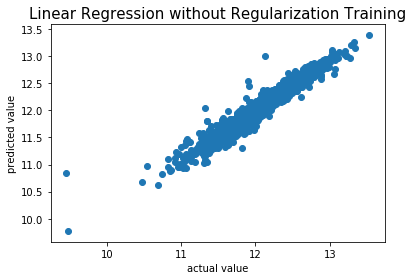

Validation:
RMSE: 14063939.394673262
R2: -1144065030921317.8


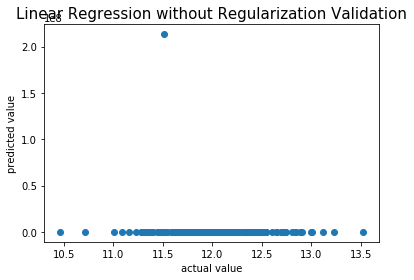

Test:
RMSE: 62198356.00117556
R2: -2.2810785340573664e+16


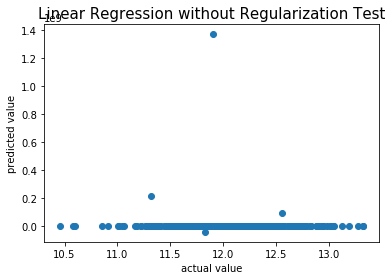

In [81]:
from sklearn import linear_model
alphas = [0]
best_rmse = None
best_model = None
for alpha in alphas:
  model = linear_model.Ridge(alpha=alpha)
  model.fit(X_trn, y_trn)
  rmse_val = metric.rmse(y_val, model.predict(X_val))
  print("alpha: {}, rmse_val: {}".format(alpha, rmse_val))
  if best_rmse is None or rmse_val < best_rmse:
    best_rmse = rmse_val
    best_model = model

print(best_model)    
eval_model(best_model, "Linear Regression without Regularization")

In [78]:
print("num: {:e}".format(62198356.001175))

num: 6.219836e+07


### Ridge Regression

alpha: 1.5e-07, rmse_val: 0.11869805247073725
alpha: 2.25e-07, rmse_val: 0.1186788311135642
alpha: 3.375e-07, rmse_val: 0.11865204866696973
alpha: 5.0625e-07, rmse_val: 0.1186161470421786
alpha: 7.593749999999999e-07, rmse_val: 0.11857088053945551
alpha: 1.1390625e-06, rmse_val: 0.11851934872589986
alpha: 1.70859375e-06, rmse_val: 0.11847096653067886
alpha: 2.562890625e-06, rmse_val: 0.11844415772489951
alpha: 3.8443359375e-06, rmse_val: 0.11846547084576103
alpha: 5.766503906249999e-06, rmse_val: 0.11856060990182007
alpha: 8.649755859375e-06, rmse_val: 0.11873646009751548
alpha: 1.29746337890625e-05, rmse_val: 0.11896284763581672
alpha: 1.946195068359375e-05, rmse_val: 0.11916990426169338
alpha: 2.9192926025390623e-05, rmse_val: 0.11926897148281368
alpha: 4.3789389038085936e-05, rmse_val: 0.11918610823763445
alpha: 6.56840835571289e-05, rmse_val: 0.11888862548532796
alpha: 9.852612533569336e-05, rmse_val: 0.11839470004014961
alpha: 0.00014778918800354004, rmse_val: 0.11776926256546298


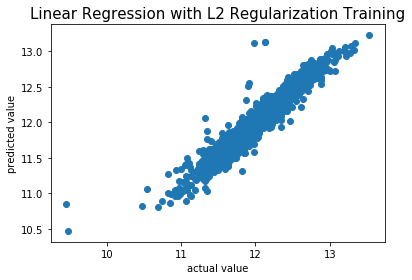

Validation:
RMSE: 0.11623496761896568
R2: 0.9218533551476845


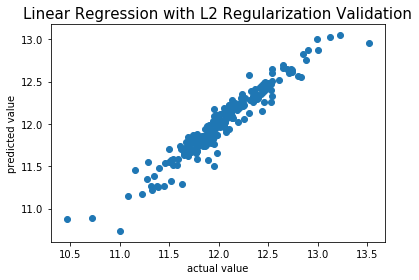

Test:
RMSE: 0.11767554575528712
R2: 0.9183502482935901


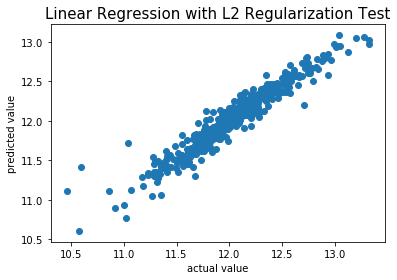

In [82]:
from sklearn import linear_model
alphas = [1e-7*(1.5**i) for i in range(1, 40)]
best_rmse = None
best_model = None
for alpha in alphas:
  model = linear_model.Ridge(alpha=alpha)
  model.fit(X_trn, y_trn)
  rmse_val = metric.rmse(y_val, model.predict(X_val))
  print("alpha: {}, rmse_val: {}".format(alpha, rmse_val))
  if best_rmse is None or rmse_val < best_rmse:
    best_rmse = rmse_val
    best_model = model

print(best_model)    
eval_model(best_model, "Linear Regression with L2 Regularization")

### Lasso Regression

alpha: 1.5e-07, rmse_val: 0.11482338904639046
alpha: 2.25e-07, rmse_val: 0.11397305492292356
alpha: 3.375e-07, rmse_val: 0.11327932670657635
alpha: 5.0625e-07, rmse_val: 0.11302483695089012
alpha: 7.593749999999999e-07, rmse_val: 0.11268756861294386
alpha: 1.1390625e-06, rmse_val: 0.11323694129512686
alpha: 1.70859375e-06, rmse_val: 0.11406899080757031
alpha: 2.562890625e-06, rmse_val: 0.11618756650639687
alpha: 3.8443359375e-06, rmse_val: 0.11658143764881854
alpha: 5.766503906249999e-06, rmse_val: 0.11726678665328366
alpha: 8.649755859375e-06, rmse_val: 0.11627427187279929
alpha: 1.29746337890625e-05, rmse_val: 0.11730738624776407
alpha: 1.946195068359375e-05, rmse_val: 0.11910546662063863
alpha: 2.9192926025390623e-05, rmse_val: 0.12192152452176237
alpha: 4.3789389038085936e-05, rmse_val: 0.13089154393933944
alpha: 6.56840835571289e-05, rmse_val: 0.14266290243351018
alpha: 9.852612533569336e-05, rmse_val: 0.15238219311563816
alpha: 0.00014778918800354004, rmse_val: 0.1669491521266919

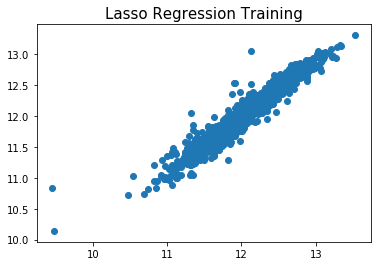

Validation:
RMSE: 0.11268756861294386
R2: 0.9265505148640627


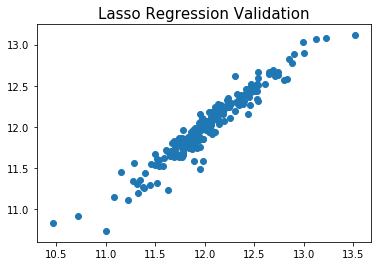

Test:
RMSE: 0.11394023969425357
R2: 0.9234515002393828


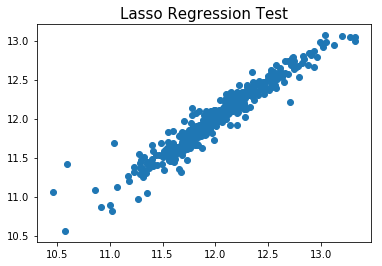

In [45]:
from sklearn import linear_model
alphas = [1e-7*(1.5**i) for i in range(1, 40)]
best_rmse = None
best_model = None
for alpha in alphas:
  model = linear_model.Lasso(alpha=alpha)
  model.fit(X_trn, y_trn)
  rmse_val = metric.rmse(y_val, model.predict(X_val))
  print("alpha: {}, rmse_val: {}".format(alpha, rmse_val))
  if best_rmse is None or rmse_val < best_rmse:
    best_rmse = rmse_val
    best_model = model

print(best_model)    
eval_model(best_model, "Lasso Regression")

### SVR

C: 3.000e+04, gamma: 3.000e-03, epsilon: 8.000e-04, rmse_val: 0.10569194924316169
C: 3.000e+04, gamma: 3.300e-03, epsilon: 8.000e-04, rmse_val: 0.10692317561659238
C: 3.000e+04, gamma: 3.700e-03, epsilon: 8.000e-04, rmse_val: 0.10630235646918595
C: 3.000e+04, gamma: 4.000e-03, epsilon: 8.000e-04, rmse_val: 0.10722370367931584
C: 3.000e+04, gamma: 3.000e-03, epsilon: 1.000e-03, rmse_val: 0.1053930371299733
C: 3.000e+04, gamma: 3.300e-03, epsilon: 1.000e-03, rmse_val: 0.10834322406681493
C: 3.000e+04, gamma: 3.700e-03, epsilon: 1.000e-03, rmse_val: 0.10622351883982938
C: 3.000e+04, gamma: 4.000e-03, epsilon: 1.000e-03, rmse_val: 0.10726702958418086
C: 3.000e+04, gamma: 3.000e-03, epsilon: 1.200e-03, rmse_val: 0.10485357715386684
C: 3.000e+04, gamma: 3.300e-03, epsilon: 1.200e-03, rmse_val: 0.10790999547101769
C: 3.000e+04, gamma: 3.700e-03, epsilon: 1.200e-03, rmse_val: 0.10570353266448956
C: 3.000e+04, gamma: 4.000e-03, epsilon: 1.200e-03, rmse_val: 0.1063661664474337
C: 3.000e+04, gamm

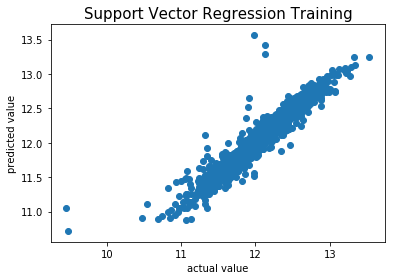

Validation:
RMSE: 0.10409077413844896
R2: 0.9373297805067502


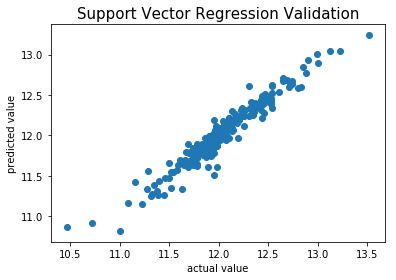

Test:
RMSE: 0.1132784248808407
R2: 0.9243381720733908


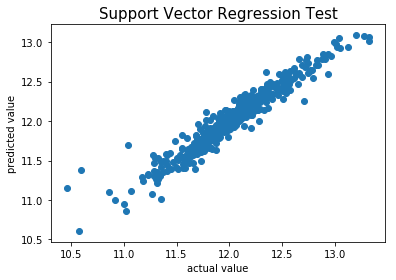

In [83]:
from sklearn.svm import SVR
Cs = [3e4, 4.4e4, 4e4, 4.5e4, 5e4]
epsilons = [0.0008, 0.001, 0.0012, 0.0015]
gammas = [0.003, 0.0033, 0.0037, 0.004]

best_rmse = None
best_model = None
for C in Cs:
  for epsilon in epsilons:
    for gamma in gammas:
      model = SVR(kernel='rbf', C=C, gamma=gamma, epsilon=epsilon)
      model.fit(X_trn, y_trn)
      rmse_val = metric.rmse(y_val, model.predict(X_val))
      print("C: {:.3e}, gamma: {:.3e}, epsilon: {:.3e}, rmse_val: {}".format(C, gamma, epsilon, rmse_val))
      if best_rmse is None or rmse_val < best_rmse:
        best_rmse = rmse_val
        best_model = model
      
print(best_model)
eval_model(best_model, "Support Vector Regression")

### Random Forest

n_estimators: 30, max_features: auto, rmse_val: 0.1412403780965935
Training:
RMSE: 0.05458329800684164
R2: 0.981884907446972


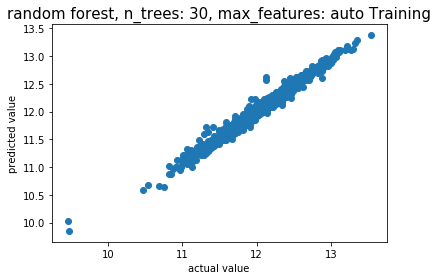

Validation:
RMSE: 0.1412403780965935
R2: 0.8846136377212738


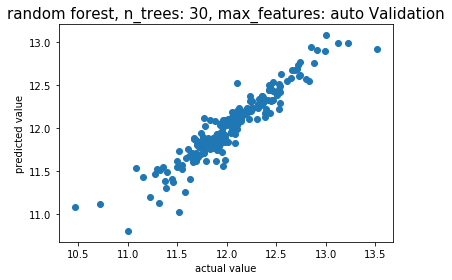

Test:
RMSE: 0.1306784872600758
R2: 0.8993090072062166


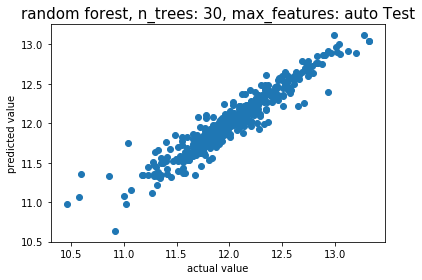

n_estimators: 30, max_features: sqrt, rmse_val: 0.13723588780284077
Training:
RMSE: 0.055371610810453886
R2: 0.9813578788092269


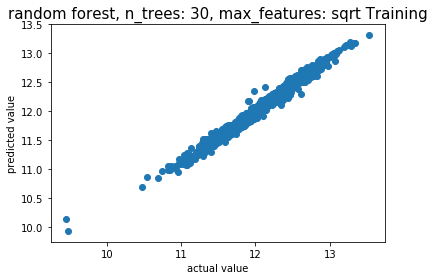

Validation:
RMSE: 0.13723588780284077
R2: 0.8910638227220247


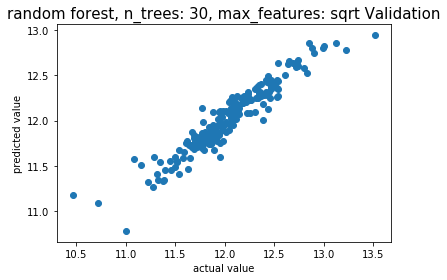

Test:
RMSE: 0.1426016357259973
R2: 0.8800966159515154


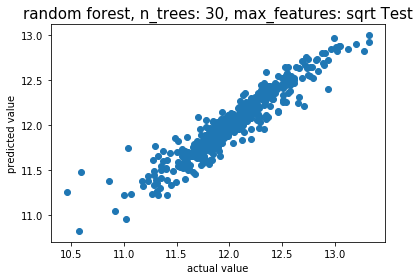

n_estimators: 100, max_features: auto, rmse_val: 0.13219612320602148
Training:
RMSE: 0.05310359742171743
R2: 0.9828537600572307


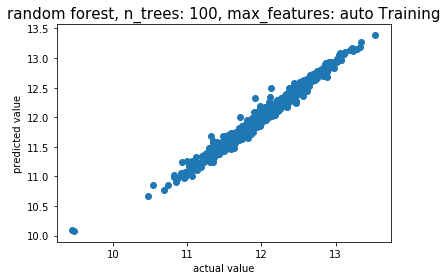

Validation:
RMSE: 0.13219612320602148
R2: 0.8989179183160628


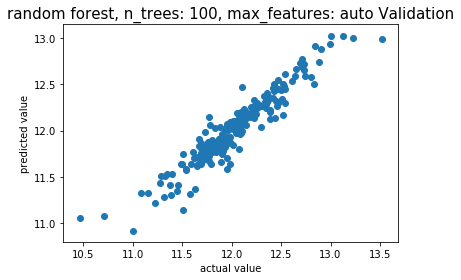

Test:
RMSE: 0.1335282965046476
R2: 0.8948694241891082


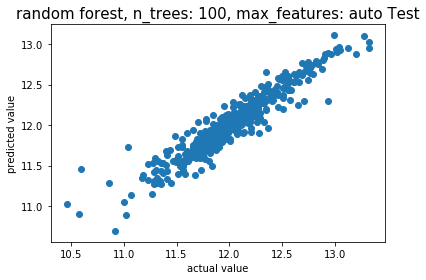

n_estimators: 100, max_features: sqrt, rmse_val: 0.1285276496188383
Training:
RMSE: 0.05389044787251231
R2: 0.9823418745692927


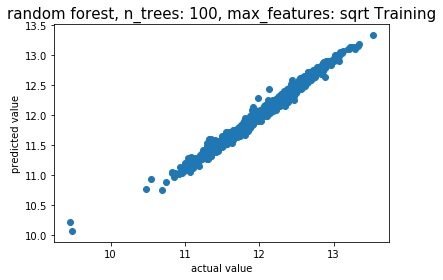

Validation:
RMSE: 0.1285276496188383
R2: 0.9044501806710508


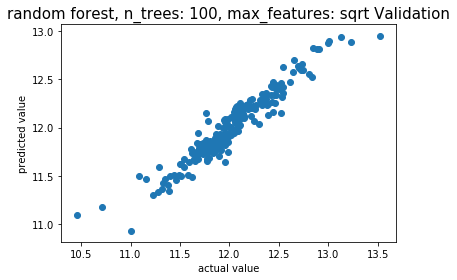

Test:
RMSE: 0.13617618516318486
R2: 0.8906585689770389


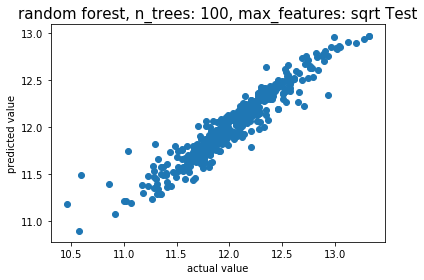

n_estimators: 300, max_features: auto, rmse_val: 0.1296561023397779
Training:
RMSE: 0.05092804733881067
R2: 0.9842298776970148


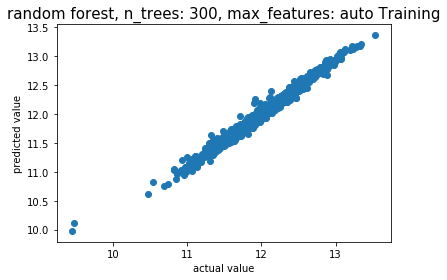

Validation:
RMSE: 0.1296561023397779
R2: 0.9027649901228302


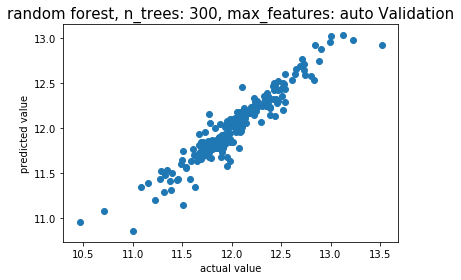

Test:
RMSE: 0.13222172034674762
R2: 0.8969167664721247


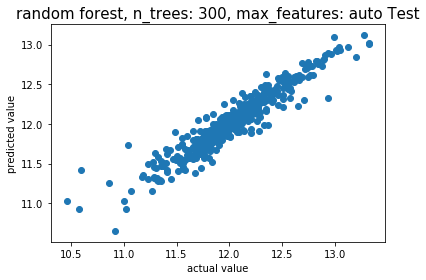

n_estimators: 300, max_features: sqrt, rmse_val: 0.1283734240268533
Training:
RMSE: 0.053665625440187416
R2: 0.9824889010602281


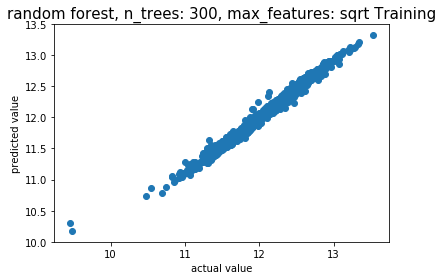

Validation:
RMSE: 0.1283734240268533
R2: 0.904679351377778


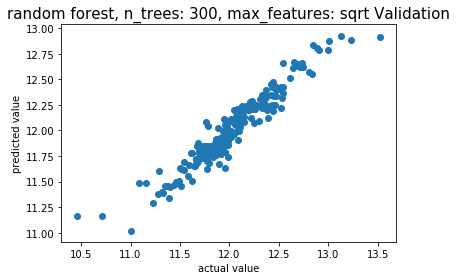

Test:
RMSE: 0.136455301541217
R2: 0.8902098816959574


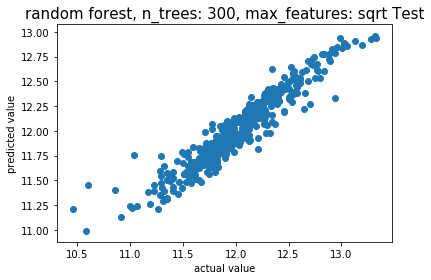

n_estimators: 1000, max_features: auto, rmse_val: 0.13017847241763475
Training:
RMSE: 0.05049817520201286
R2: 0.9844949782043614


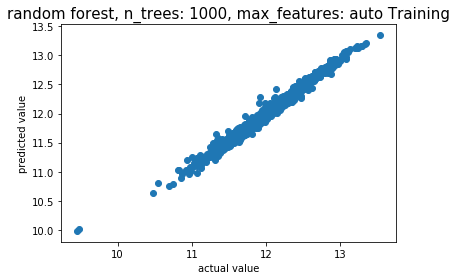

Validation:
RMSE: 0.13017847241763475
R2: 0.9019799136356929


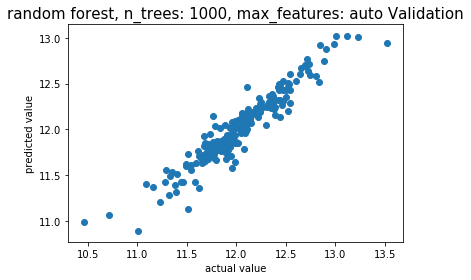

Test:
RMSE: 0.131417904897295
R2: 0.8981663044513299


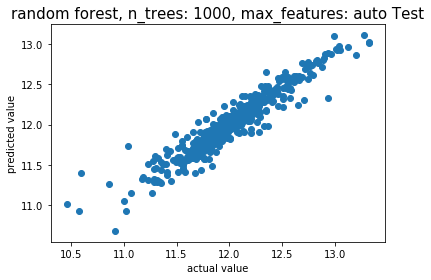

n_estimators: 1000, max_features: sqrt, rmse_val: 0.1280849102275801
Training:
RMSE: 0.051906249810927924
R2: 0.9836182491439635


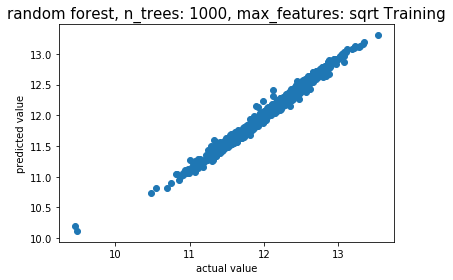

Validation:
RMSE: 0.1280849102275801
R2: 0.9051073280975132


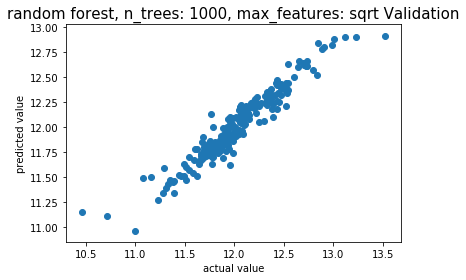

Test:
RMSE: 0.13619908647528786
R2: 0.8906217890834929


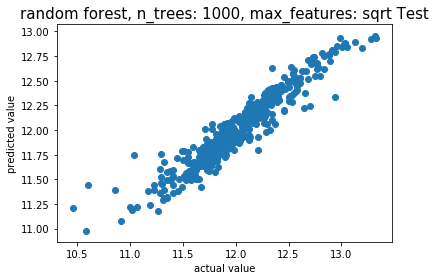

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Training:
RMSE: 0.051906249810927924
R2: 0.9836182491439635


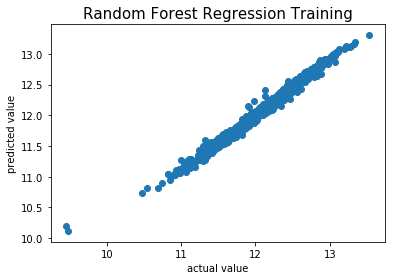

Validation:
RMSE: 0.1280849102275801
R2: 0.9051073280975132


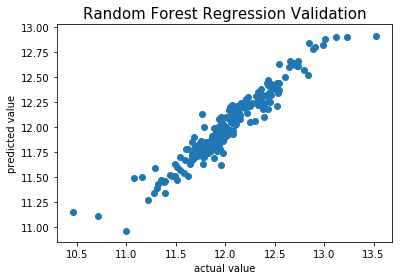

Test:
RMSE: 0.13619908647528786
R2: 0.8906217890834929


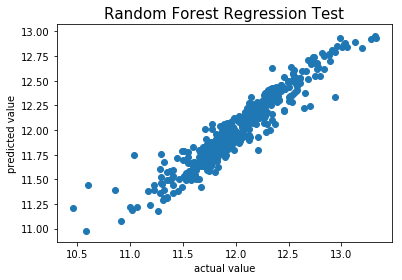

In [9]:
from sklearn.ensemble import RandomForestRegressor
n_estimators_list = [30, 100, 300, 1000]
max_features_ops = ['auto', 'sqrt']

best_rmse = None
best_model = None

for n_estimators in n_estimators_list:
  for max_features in max_features_ops:
    model = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features)
    model.fit(X_trn, y_trn)
    rmse_val = metric.rmse(y_val, model.predict(X_val))
    print("n_estimators: {}, max_features: {}, rmse_val: {}".format(n_estimators, max_features, rmse_val))
    eval_model(model, "random forest, n_trees: {}, max_features: {}".format(n_estimators, max_features))
    if best_rmse is None or rmse_val < best_rmse:
      best_rmse = rmse_val
      best_model = model
    
print(best_model)
eval_model(best_model, "Random Forest Regression")